<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Stochastic dynamic systems </font></p>
<p></p>
<p><font size="5">  Notebook 02: Julia lab - Stochastic differential equations </font></p>
</p></br>
<p><font size="5">  Gonzalo Quintana and Tales Marra </font></p>
</p>
</CENTER>

----------

# <span style="color:#00B8DE">I - Simulation of SDEs (lab 4)</span>

1 - Define a function **Gauss(m=0,v=1)** that returns a function that takes an argument $x$ and returns the value $\mathcal{N}(x;m,v)$.

2 - Define a structure named **Brownian** with the following fields: 

    Δ     # sampling stepsize
    Tmin  # initial time
    Tmax  # final time
    B0    # initial value
    σ2    # variance
Add methods **sample** and **draw** that respectively sample the Brownian motion and plots a given number of trajectories. Design also a method **hist** that plots the histogram of the Brownian motion at a given time $t$ in $[Tmin,Tmax]$ and for a given number of realizations.

3 - Run the code and check that the results are coherent.

4 - We consider the Black-Scholes equation
$$
dX_t = rX_tdt + aX_tdB_t
$$
with $r=-1$ and $a=1$. Recall the analytic solution for this equation and plot it over
$[0,1]$for realizations of $B_t$ sampled at 1000 points.

5 - Implement Euler, Millstein and Runge-Kutta with orer 1.5 methods. Possibly, create a **model** structure with fields drift, diffusion and the derivative of diffusion so that the integration method can apply automatically from model and Brownian trajectory specification. 
Plot the solutions corresponding solutions and compute the mean squared error. Possibly different sampling stepsize could be considered. Conclusions ?

In [1]:
using Plots
using Distributions
using Random
using Statistics

In [2]:
# 1
function gauss_pdf(x,m=0.,σ2=1.)
    return pdf(Normal(m,σ2),x)
end

gauss_pdf (generic function with 3 methods)

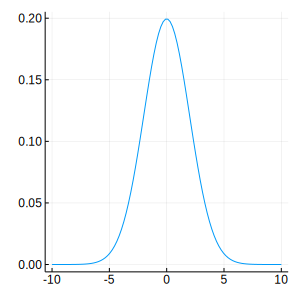

In [3]:
x= range(-10,stop=10,length=100)
f = gauss_pdf.(x,0.,2.)
plot(x,f,size=(300,300),label="")

In [4]:
# 2
struct Brownian_motion

    Δ     # sampling stepsize
    Tmin  # initial time
    Tmax  # final time
    B0    # initial value
    σ2    # variance

    Brownian_motion(Δ, Tmin, Tmax, B0, σ2) = new(Δ, Tmin, Tmax, B0, σ2)

end#struct##

In [5]:
#test
B = Brownian_motion(.01,0.,1.,0.,1.)
B.Δ,B.Tmin,B.Tmax,B.B0,B.σ2 

(0.01, 0.0, 1.0, 0.0, 1.0)

In [8]:
function sample(B::Brownian_motion)
    # Generates a trajectories of the brownian motion B
    # returns a trajectory on [B.Tmin,B.Tmax]
    t = B.Tmin:B.Δ:B.Tmax
    x = zeros(size(t)[1])
    i = 
    x[1] = B.B0
    
    for i=2:size(t)[1]
        
        x[i] = x[i-1] + sqrt(B.σ2*B.Δ)*randn()
        
    end
    
    return x
end

function draw(B::Brownian_motion ; nb_traj=100,enveloppe=true)
    # Plots trajectories of the brownian motion
    # nb_traj: number of trajectories to be plot
    # enveloppe: plots the enveloppe at B0+(+/-)3std
    
    t = B.Tmin:B.Δ:B.Tmax

    p = plot(t, sample(B))
    
    for i=2:nb_traj
       
        plot!(p, t, sample(B))
        
    end
    
    idxs = 1:1:size(t)[1]
    
    if enveloppe
    
        e_plus = 3*sqrt.(B.σ2*idxs*B.Δ) .+ B.B0
        
        e_minus = - 3*sqrt.(B.σ2*idxs*B.Δ) .+ B.B0

        plot!(p, t, e_plus, c="black")

        plot!(p, t, e_minus, c="black")

    end

    p
    
end

draw (generic function with 1 method)

In [9]:
#test
draw(B;nb_traj=10^3)

In [12]:
function hist(B ; nb_traj=1000, t= :Nan)
    # Plots the histogram at t from nb_traj trajectories
    # of the Brownian motion together with the
    # theoretical distribution
    
    idx = trunc(Int, (t - B.Tmin)/B.Δ)
    y = zeros(nb_traj)
    
    for i=1:nb_traj
       
        y[i] = sample(B)[idx]
        
    end
    
    p = histogram(y)
    
    x= range(-3*sqrt(B.σ2*B.Δ),stop=3*sqrt(B.σ2*B.Δ),length=100)
    f = gauss_pdf.(x,0.,B.σ2*B.Δ)
    #plot(x,f,size=(300,300),label="")
    
    p
    
end

hist (generic function with 1 method)

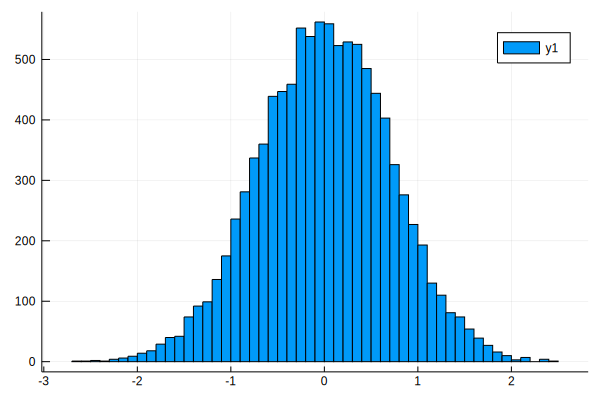

In [13]:
# 3
hist(B ; nb_traj=10^4, t=.5) #4

In [14]:
# 4

# Black-Scholes model
# Equation dX_t = rX_tdt + aX_tdB_t, with r=-1 et a=1
#----------------------------------------------------
r,a,X0  = -1.,1.,1.

function black_scholes_trajectory(t,Bt;r=-1.,a=1.,X0=1.)
    # returns sampling instants and samples
    # of a Black-holes trajectory
    # t:  sampling instants
    # Bt: brownian motion trajectory
    # r:  drift coefficient
    # a:  diffusion coefficient 
    # X0: initial value
    # Bt:  input brownian motion trajectory
    
    x = zeros(length(Bt))
    
    deltaB = [Bt[i+1]-Bt[i] for i=1:length(Bt)-2]
    Δ = t[2]-t[1]
    x[1]=X0

    for i=2:length(t)-1
       
        x[i]=x[i-1]+r*x[i-1]*Δ+a*x[i-1]*deltaB[i-1]
        
    end
    
    return x
    
end

black_scholes_trajectory (generic function with 1 method)

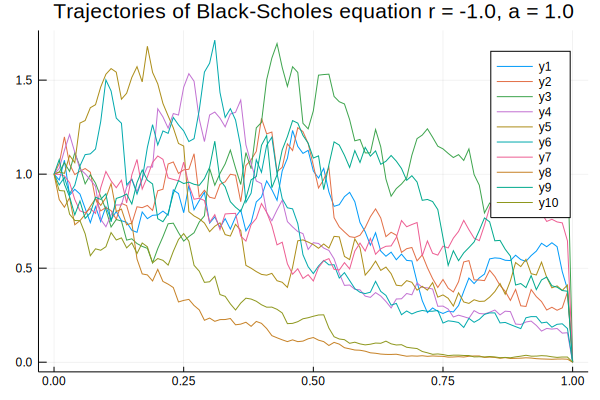

In [15]:
# test
B = Brownian_motion(.01,0.,1.,0.,1.)
p = plot()

for j =1:10
    
    t = B.Tmin:B.Δ:B.Tmax
    X = black_scholes_trajectory(t, sample(B))
    p    = plot!(t,X)
    
end
p = title!("Trajectories of Black-Scholes equation r = $r, a = $a")


In [16]:
# 5

struct model
    drift
    diffusion
    diffusion_derivative

    model(drift, diffusion, diffusion_derivative)= new(drift, diffusion, diffusion_derivative)
    
end

In [17]:
m = model((t,x)->r*x,(t,x)->a*x,(t,x)->a)

model(getfield(Main, Symbol("##10#13"))(), getfield(Main, Symbol("##11#14"))(), getfield(Main, Symbol("##12#15"))())

In [18]:
function integrate(m::model,t,Bt;X0=0,method="Euler")
    # Returns the trajectory of a stochastic differential equations
    # t:  sampling instant
    # Bt: input brownian motion trajectory
    # X0: initial value
    # method: 'Euler', 'Milstein' or 'Runge_Kutta_1.5'
    # output: trajectory X of the SDE
    
    
    x = zeros(length(Bt))
    
    deltaB = [Bt[i+1]-Bt[i] for i=1:length(Bt)-2]
    Δ = t[2]-t[1]
    x[1]=X0
    
    if method=="Euler"

        for i=2:length(t)-1

            x[i]=x[i-1]+m.drift(t[i-1],x[i-1])*Δ+m.diffusion(t[i-1],x[i-1])*deltaB[i-1]

        end
    elseif method=="Milstein"
            
        for i=2:length(t)-1
                
            correction = 1/2*m.diffusion(t[i-1],x[i-1])*m.diffusion_derivative(t[i-1],x[i-1])*(deltaB[i-1]^2-Δ)

            x[i]=x[i-1]+m.drift(t[i-1],x[i-1])*Δ+m.diffusion(t[i-1],x[i-1])*deltaB[i-1]+correction
        end
            
    
    else
            
        for i=2:length(t)-1
            
            x_prim=x[i-1]+m.drift(t[i-1],x[i-1])*Δ+m.diffusion(t[i-1],x[i-1])*sqrt(Δ)
                
            correction = 1/2*(m.diffusion(t[i-1],x_prim)-m.diffusion(t[i-1],x[i-1]))*(deltaB[i-1]^2-Δ)/sqrt(Δ)

            x[i]=x[i-1]+m.drift(t[i-1],x[i-1])*Δ+m.diffusion(t[i-1],x[i-1])*deltaB[i-1]+correction
        end
            
    end
    
    return x
    
end

integrate (generic function with 1 method)

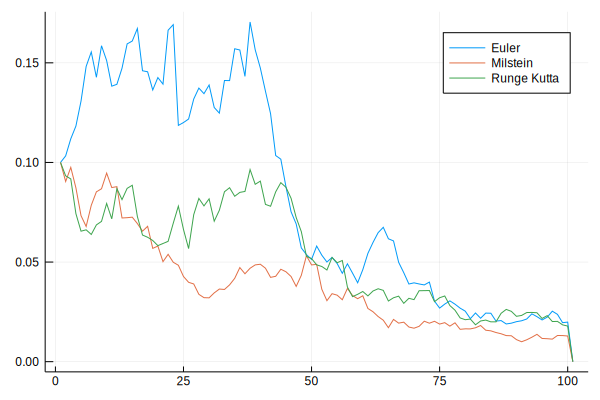

In [19]:
# Figures

# test
B = Brownian_motion(.01,0.,1.,0.,1.)
t = B.Tmin:B.Δ:B.Tmax
methods_names = ["Euler" "Milstein" "Runge Kutta"]
p = plot()
x = zeros(length(t),3)
i = 1

for met in methods_names
    
    x[:,i] = integrate(m,t,sample(B),X0=0.1, method=met)
    p=plot!(x[:,i], label=met)
    i += 1
end
p

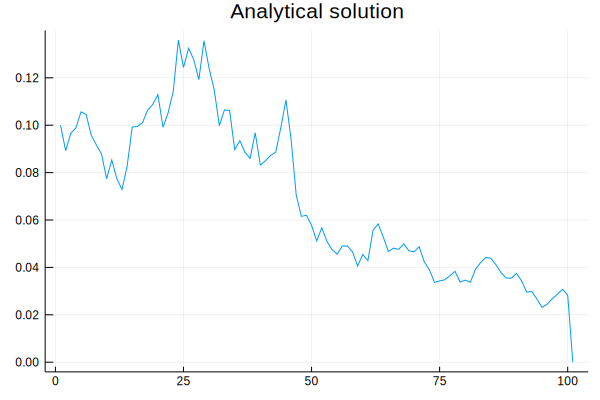

In [20]:
using Statistics: var

t = B.Tmin:B.Δ:B.Tmax

Bt = sample(B)
x_true = zeros(size(Bt))
x_true[1] = 0.1

for i=2:length(t)-1
    
    x_true[i] = x_true[1]*exp((r-1/2*a^2)*t[i]+a*Bt[i]) 
    
end

plot(x_true, title="Analytical solution", label="")

MSE Euler: 0.0009988160899574796
MSE Milstein: 0.0014971097645355093
MSE Runge Kutta: 0.0005505744296783825


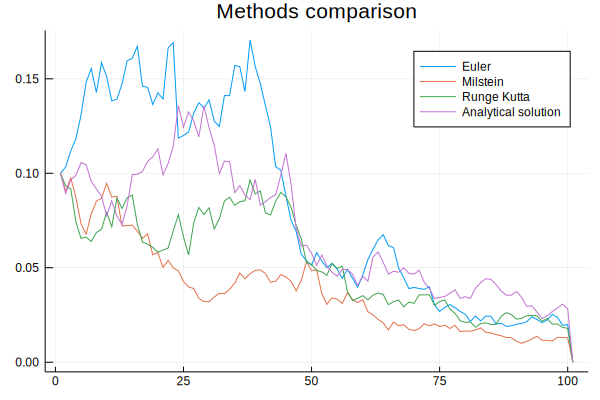

In [21]:
MSE_euler = mean((x[:,1].-x_true).^2)
MSE_milstein = mean((x[:,2].-x_true).^2)
MSE_rk = mean((x[:,3].-x_true).^2)

println("MSE Euler: ", MSE_euler)
println("MSE Milstein: ", MSE_milstein)
println("MSE Runge Kutta: ", MSE_rk)

p = plot()
i=1
for met in methods_names
    
    p=plot!(x[:,i], label=met)
    i += 1
end

p=plot!(x_true, label="Analytical solution", title="Methods comparison")

p

-------

# <span style="color:#00B8DE">II - Parameter estimation for SDEs (lab 5&6)</span>

Let us consider the following SDE:
$$
dX_t=b(X_t)dt+\theta\sigma(X_t)dB_t\quad (1)
$$
a regularly sampled trajectory of which is observed at instants $t_i$. let $X_i=X_{t_i}$ ($i=1,\ldots,n$) 
denote observation variables $x_i,…,x_n$ corresponding observations. We shall assume that functions $b(x)$ and
$\sigma(x)$ are known but that $\theta$ is unknown 
 and changes at a given, instant that we want to estimate.

1 - Denoting by $\Delta$ the sampling period, supply the discretized version of (1) for Euler sampling method.

2 - We define the normalized increments as
$$
Z_i=\theta \dfrac{B_{i+1}−B_i}{\sqrt \Delta}\quad (2)
$$
Express $Z_i$ in terms of observation variables  Xi and give their distribution.

3 - Let $k$ denote the index value in $\{2,\ldots,n−1\}$ from which the value of $\theta$ 
changes. Let $\theta_1$ denote the value taken by $\theta$ until the time $\tau$ corresponding to $k$
and $\theta_2$ the value it takes after this instant. Compute maximum likelihood estimators of $\theta_1^2$ and $\theta_2^2$ as a function of $\tau$.

4 - Then check that the maximum likelihood estimator of the position $k$ of system transition is given by 
$\hat{k}=\arg\min_k D_k$, with
$$
D_k=k\log\dfrac{S_k}{k}+(n−k)\log\dfrac{S_n−S_k}{n−k}\quad (3)
$$
and $S_k=\sum^k_{i=1}Z^2_i$.

5 - As an example, we consider the Cox-Ingersoll-Ross processus with equation
$$
dX_t=(a−bX_t)dt+θ\sqrt{X_t}dBt \quad (4)
$$
This model has been used first to model population growth. The solution is given by
$$
X_t=X_0+\dfrac a b (1−e^{−bt})+\theta\int_0^te^{b(u−t)}\sqrt{X_u}dB_u\quad (5)
$$
6 - Let $(a,b)=(5,2)$, $\tau=0.6$ and $(\theta_1,\theta_2)=(1,3)$. 
Plot a few trajectories of the process over $[0,1]$ with for instance $X_0=4$. 
To this end, you can discretize the solution (5) directly with a stepsize $\Delta=10^{−2}$.

7 - Plot the evolution of the decision variable $D_k$ with $k$ for several simulated  trajectories.

8 - Estimate $\tau$ and $(\theta_1,\theta_2)$ for these trajectories and plot the sequence of values obtained.

9 - In the case where $b(x)$ and $\sigma(x)$ are unknown, we can rewrite the model in the form 
$dX_t=b(X_t)dt+\theta dB_t$. Then we can estimate $b(x)$ via a non parametric kernel method and then apply the method considered above to detect the instant when the diffusion term of the system changes. Implementez this approach and apply it to the observed trajectory. Study the values obtained for the estimates of $\tau$ and $(\theta_1,\theta_2)$. Comments ?

In [86]:
# 6 - trajectories of Cox-Ingersoll-Ross process
# note that in some cases numerical errors can lead
# to negative values
#------------------------------------------------
a = 5
b = 2
τ = 0.6
θ1 = 1
θ2 = 3
Δ = 0.01
n_traj = 10
tmin = 0
tmax = 1
x = zeros(trunc(Int,1/Δ), n_traj)
x[1,:] = 4*ones(n_traj)
z = zeros(trunc(Int,1/Δ)-1, n_traj)
N = trunc(Int,1/Δ)


B = Brownian_motion(Δ,tmin,tmax,0.,1.)

t = tmin:Δ:tmax
u = tmin:Δ:tmax

for i=1:n_traj
    
    Bvec = sample(B)
    deltaB = [Bvec[i+1]-Bvec[i] for i=1:length(Bvec)-2]
    #z[:,i] = deltaB./sqrt(Δ)
        
    for j=2:trunc(Int,1/Δ)
        
        if t[j]<τ
            θ = θ1
        else
            θ = θ2
        end
        
        x[j,i]=x[j-1,i]+(a-b*x[j-1,i])*Δ+θ*sqrt(x[j-1,i])*deltaB[j-1]
                
    end
    
    z[:,i]=(x[2:N,i]-x[1:N-1,i]+(a.-b.*x[1:N-1,i])*Δ)./sqrt.(x[1:N-1,i]*Δ)
    
    
end



#idx = trunc(Int,τ*(tmax-tmin)/Δ)
#z[1:idx,:] = z[1:idx,:].*θ1;
#z[idx+1:size(z)[1]-1,:] = z[idx+1:size(z)[1]-1,:].*θ2;

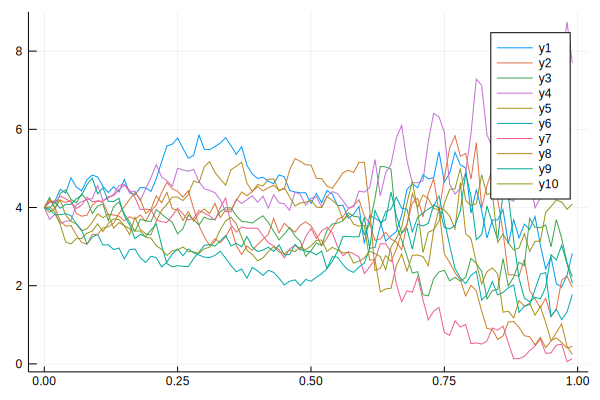

In [87]:
p = plot(t[1:length(t)-1],x[:,1])

for i=2:n_traj
   
    plot!(t[1:length(t)-1],x[:,i])
    
end

p

In [88]:
# 7 & 8 - Decision variable D_k
#--------------------------------------
D = zeros(trunc(Int,1/Δ), n_traj)
n=trunc(Int,1/Δ)

for i=1:n_traj
    
    Sn = sum(z[:,i].^2)
   
    for k=1:n-1
       
        Sk = sum(z[1:k,i].^2)
        
        D[k,i] = k*log(Sk/k)+(n-k)*log((Sn-Sk)/(n-k))
        
    end
    
end

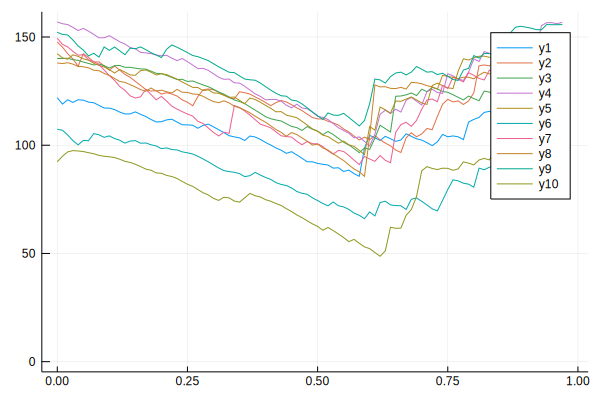

In [89]:
idxs = zeros(n_traj)
τvec = zeros(n_traj)

p = plot()

for i=1:n_traj
   
    plot!(t[1:length(t)-1],D[:,i])
    
    idxs[i]=argmin(D[1:trunc(Int,1/Δ)-2,i])
    
end

τvec = idxs.*Δ/(tmax-tmin)


p

In [91]:
print("τ estimation: ", mean(τvec))

τ estimation: 0.607

In [92]:
n=trunc(Int,1/Δ)

θ1vec = zeros(n_traj)
θ2vec = zeros(n_traj)

for i=1:n_traj
   
    k = trunc(Int,idxs[i])
    θ1vec[i] = sqrt(sum(z[1:k,i].^2)/k)
    θ2vec[i] = sqrt(sum(z[k+1:n-1,i].^2)/(n-k))
    
end

In [93]:
print("θ1 estimation: ", mean(θ1vec))

θ1 estimation: 1.0390742332679384

In [94]:
print("θ2 estimation: ", mean(θ2vec))

θ2 estimation: 2.899833663637717

## Estimation with unkown drift

In [74]:
# 9 - Estimation with unknown drift
#---------------------------------------

function b_estim(z,K)
    numerator = sum([K(z.-x[j-1]).*(x[j]-x[j-1]) for j=2:n-1])
    denominator = (Δ*sum([K(z.-x[j-1]) for j=2:n-1]))
    return numerator/denominator
end


for i=1:n_traj

    hn = std(x[:,i])*n^(-1/5)
    K(x) = 1/(sqrt(2*pi)*hn).*exp.(-x.^2/(2*hn))
            
    z[:,i]=(x[2:N,i]-x[1:N-1,i]+b_estim.(x[1:N-1,i],K)*Δ)./sqrt.(x[1:N-1,i]*Δ)
        
end

    

In [75]:

D = zeros(trunc(Int,1/Δ), n_traj)
n=trunc(Int,1/Δ)

for i=1:n_traj
    
    Sn = sum(z[:,i].^2)
   
    for k=1:n-1
       
        Sk = sum(z[1:k,i].^2)
        
        D[k,i] = k*log(Sk/k)+(n-k)*log((Sn-Sk)/(n-k))
        
    end
    
end

In [85]:
idxs = zeros(n_traj)
τvec = zeros(n_traj)

p = plot()

for i=1:n_traj
   
    plot!(p,t[1:length(t)-1],D[:,i])
    
    idxs[i]=argmin(D[1:trunc(Int,1/Δ)-2,i])
    
end

τvec = idxs.*Δ/(tmax-tmin)


p

print("τ estimation: ", mean(τvec))

τ estimation: 0.598

In [77]:
n=trunc(Int,1/Δ)

θ1vec = zeros(n_traj)
θ2vec = zeros(n_traj)

for i=1:n_traj
   
    k = trunc(Int,idxs[i])
    θ1vec[i] = sqrt(sum(z[1:k,i].^2)/k)
    θ2vec[i] = sqrt(sum(z[k+1:n-1,i].^2)/(n-k))
    
end

In [84]:
println("θ1 estimation: ", mean(θ1vec))

θ1 estimation: 0.9985117378797694


In [83]:
println("θ2 estimation: ", mean(θ2vec))

θ2 estimation: 3.4184997486794337


----------